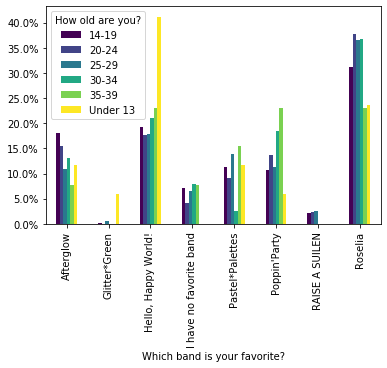

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# Columns/questions
region = "Where are you from?"
gender = "What is your gender?"
age = "How old are you?"
band = "Which band is your favorite?"
character = "Who is your best girl overall?"

# Values/answers
no_response = "Prefer not to say"


def main():
    df = pd.read_csv("responses_2018.csv")
    region_counts = df[region].value_counts()
    gender_counts = df[gender].value_counts()
    age_counts = df[age].value_counts()

    # Filter
    df = df[[region, gender, age, band, character]]
    df = filter_age(df, age_counts)

    # make frequency table of band vs age, and normalize within age group
    # i.e. each value is percent of people in age group that are fans
    band_region_counts = pd.crosstab(df[band], df[age], normalize="columns")

    # Plot
    ax = band_region_counts.plot(kind="bar", colormap="viridis")
    ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
    plt.show()


def draw_heatmap(df, region_counts):
    likes_pp = df[df[band] == "Poppin'Party"]
    likes_pp = filter_region(filter_gender(likes_pp), region_counts)
    pp_counts = pd.crosstab(likes_pp[gender], likes_pp[region], normalize="columns")
    print(pp_counts)

    plt.title("Poppin'Party as Favourite Band")
    ax = sns.heatmap(pp_counts, annot=True, cmap="coolwarm")
    fix_heatmap()
    ax.vlines(list(range(len(pp_counts.columns))), *ax.get_ylim())  # add lines to separate columns
    plt.show()


def filter_gender(df):
    return df[df[gender] != no_response]


def filter_age(df, age_counts=None):
    # remove all from low-count age ranges
    # https://stackoverflow.com/a/34916913
    df = df[df.isin(age_counts.index[age_counts > 10]).values] if age_counts is not None else df

    return df[df[age] != no_response]


def filter_region(df, region_counts=None):
    # remove all from low-count region
    # https://stackoverflow.com/a/34916913
    return df[df.isin(region_counts.index[region_counts > 100]).values] if region_counts is not None else df


def fix_heatmap():
    """
    Fixes Seaborn bug that crops top/bottom of heatmap on show
    https://github.com/mwaskom/seaborn/issues/1773#issuecomment-546466986
    """
    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim()  # discover the values for bottom and top
    b += 0.5  # Add 0.5 to the bottom
    t -= 0.5  # Subtract 0.5 from the top
    plt.ylim(b, t)  # update the ylim(bottom, top) values


main()
